### 1

In [1]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Laptop GPU'

In [4]:
torch.cuda.set_device(0)

In [5]:
from ultralytics import YOLO
from PIL import Image

In [6]:
model = YOLO('qr1.pt')

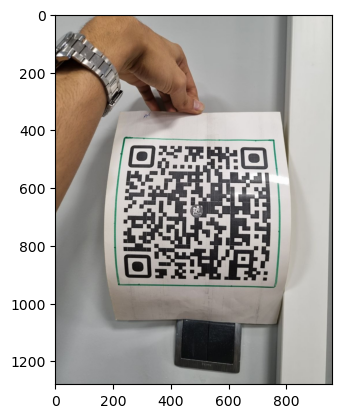

In [7]:
img_path = r"C:\Users\JoJo\Downloads\qrcode\photo_2024-08-18_09-15-10.jpg"
# img = cv2.imread(img_path)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)


0: 640x480 1 0, 73.9ms
Speed: 7.8ms preprocess, 73.9ms inference, 211.6ms postprocess per image at shape (1, 3, 640, 480)


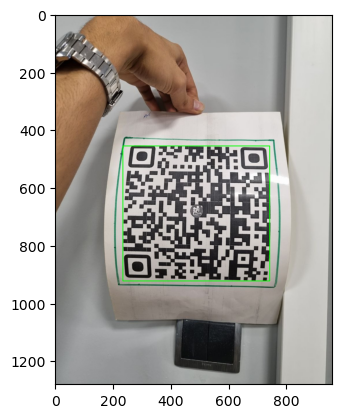

In [8]:
results = model(img, conf=0.5)

for r in results:
    boxes = r.boxes.xyxy
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.cpu().numpy())
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cropped=img[y1:y2, x1:x2]
plt.imshow(img)

In [9]:
# results = model(img, conf=0.5)

# for r in results:
#     masks = r.masks.data if r.masks is not None else None
#     boxes = r.boxes.xyxy
    
#     # Create a blank mask the same size as the original image
#     full_mask = np.zeros(img.shape[:2], dtype=np.uint8)
    
#     for mask, box, cls in zip(masks, boxes, classes):
#         seg_mask = (mask.cpu().numpy() > 0.5).astype(np.uint8) if mask is not None else None
#         x1, y1, x2, y2 = map(int, box.cpu().numpy())
        
#         if seg_mask is not None:
#             cropped_mask = cv2.resize(seg_mask, (x2-x1, y2-y1))
#             # Place the cropped mask in the correct position on the full mask
#             full_mask[y1:y2, x1:x2] = cropped_mask
#         else:
#             # If there's no segmentation mask, just fill the bounding box area
#             full_mask[y1:y2, x1:x2] = 1
        
#     # Apply the mask to the entire image
#     masked_image = cv2.bitwise_and(img, img, mask=full_mask)
    
#     # Draw bounding boxes
#     for box in boxes:
#         x1, y1, x2, y2 = map(int, box.cpu().numpy())
#         cv2.rectangle(masked_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
# plt.imshow(masked_image)

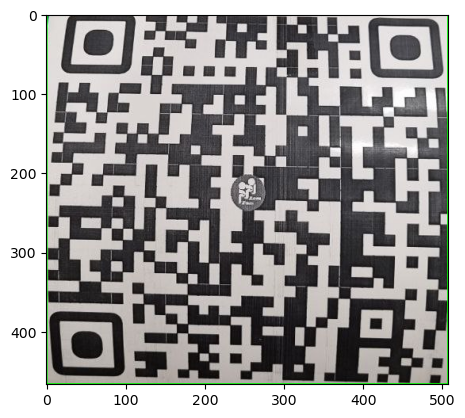

In [10]:
plt.imshow(cropped)
# detect_qr(flattened_image)

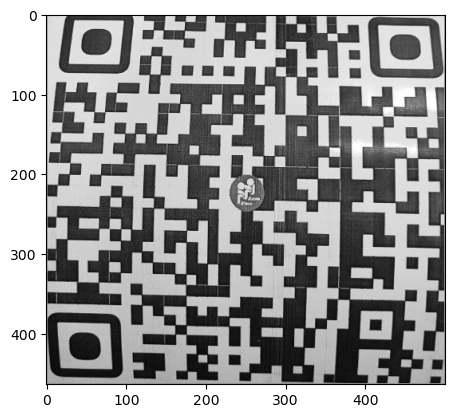

In [50]:
cropped = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
plt.imshow(cropped, cmap = "gray")

In [51]:
decode(cropped)

[]

### 2

In [21]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

In [22]:
img = cv2.imread(r"C:\Users\JoJo\Downloads\qrcode\photo_2024-08-15_15-25-03.jpg")


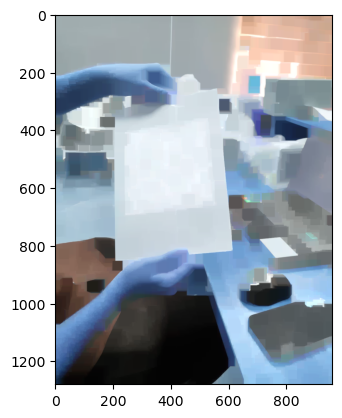

In [25]:
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations= 5)
plt.imshow(img)

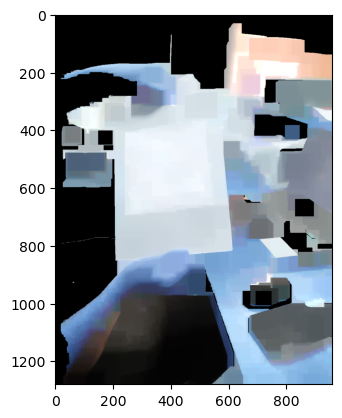

In [68]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (20,20,img.shape[1]-20,img.shape[0]-20)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)

In [49]:
import cv2
import numpy as np

def detect_curved_paper_border(image_path):
    # Read the image
    image = cv2.imread(image_path)
    original = image.copy()

    # Preprocess the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour (likely the paper)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Smooth the contour
        epsilon = 0.005 * cv2.arcLength(largest_contour, True)
        smooth_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

        # Draw the detected border
        cv2.drawContours(image, [smooth_contour], -1, (0, 255, 0), 3)

        # Display the result
        cv2.imshow("Detected Curved Paper Border", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        return smooth_contour
    else:
        print("No contours found")
        return None

# Usage
image_path = r"C:\Users\JoJo\Downloads\qrcode\photo_2024-08-17_08-51-43.jpg"
paper_border = detect_paper_border(image_path)

[]

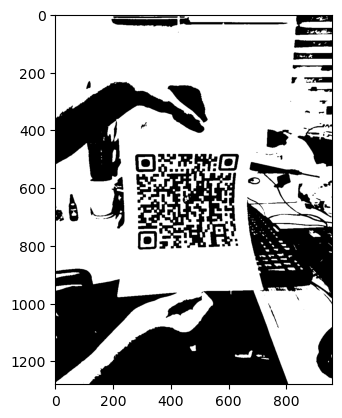

In [97]:
import cv2
from pyzbar.pyzbar import decode
from pyzbar.pyzbar import ZBarSymbol

image_path = r"C:\Users\JoJo\Downloads\qrcode\photo_2024-08-15_15-25-08.jpg"
# preprocessing using opencv
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(im, (5, 5), 0)
ret, bw_im = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(bw_im, cmap='gray')
# zbar
decode(bw_im, symbols=[ZBarSymbol.QRCODE])

### 3

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode

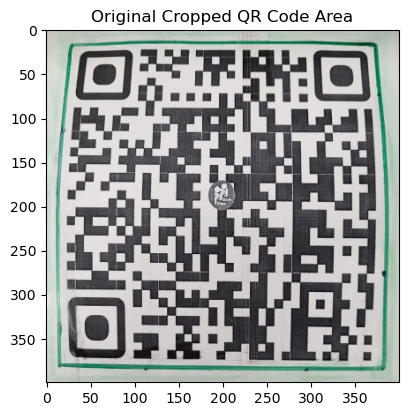

In [18]:
# Load the image
image = cv2.imread(r"C:\Users\JoJo\Downloads\qrcode\photo_2024-08-18_12-20-59.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Detect edges using Canny
edges = cv2.Canny(gray, 50, 150)

# Detect contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Assume the largest contour is the QR code
largest_contour = contours[0]

# Get the bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the QR code area
qr_code_area = image[y-20:y+h+20, x-20:x+w+20]

# Show the original and unwrapped image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Cropped QR Code Area')
result = cv2.cvtColor(qr_code_area, cv2.COLOR_BGR2RGB)
result = cv2.resize(result, (400, 400))
plt.imshow(result)

[]

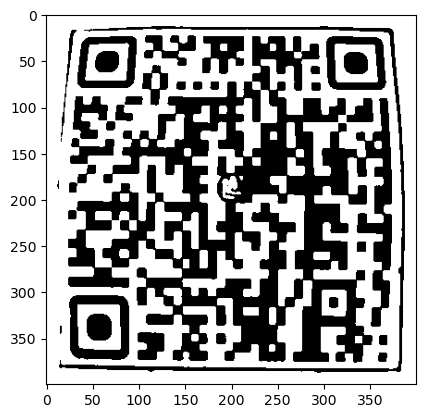

In [19]:
result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(result, (5, 5), 0)
ret, bw_im = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(bw_im, cmap='gray')
decode(bw_im)

[[255   0   0   0 255]
 [255   0   0   0 255]
 [255   0   0   0 255]
 [255   0   0   0 255]
 [  0   0   0 255   0]]


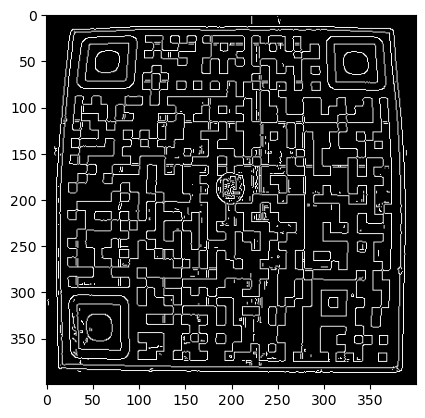

In [20]:
canny = cv2.Canny(result, 80, 120)
plt.imshow(canny, cmap='gray')
print(canny[25:30,25:30])

In [21]:
q1 = []
for j in range(0, 40):
    for i in range(0, 40):
        if canny[j, i] == 255:
            x = i**2 + j**2
            q1.append([i, j, x])
            # break

q1 = min(q1, key=lambda pair: pair[2])
q1 = [q1[0], q1[1]]
print(q1)

[27, 17]


In [22]:
q2 = []
for j in range(0, 40):
    for i in range(360, 400):
        if canny[j, i] == 255:
            x = j**2 + (400 - i)**2
            q2.append([i, j, x])
            # break

q2 = min(q2, key=lambda pair: pair[2])
q2 = [q2[0], q2[1]]
print(q2)

[375, 17]


In [23]:
q3 = []
for j in range(360, 400):
    for i in range(0, 40):
        if canny[j, i] == 255:
            x = i**2 + (400 - j)**2
            q3.append([i, j, x])
            # break

q3 = min(q3, key=lambda pair: pair[2])
q3 = [q3[0], q3[1]]
print(q3)

[14, 383]


In [24]:
q4 = []
for j in range(360, 400):
    for i in range(360, 400):
        if canny[j, i] == 255:
            x = (400 - i)**2 + (400 -j)**2
            q4.append([i, j, x])
            # break
# q4 = []
# for j in range(360, 400):
#     for i in range(360, 400):
#         if bw_im[j, i] == 0:
#             x = (400 - i)**2 + (400 -j)**2
#             q4.append([i, j, x])
#             break
# max_i = max(pair[1] for pair in q4)
# max_j = max(pair[0] for pair in q4)
# q4 = [max_j, max_i]
# q4 = [max_i, max_j]

q4 = min(q4, key=lambda pair: pair[2])
q4 = [q4[0], q4[1]]
print(q4)

[384, 385]


In [25]:
q5 = [0, 0]
j = int((q1[1]+q3[1])/2)
for i in range(0, 40):
    if canny[j, i] == 255:
        q5[0]=i
        break
q5[1]=j
print(q5)

[11, 200]


In [26]:
q6 = [0, 0]
j = int((q2[1]+q4[1])/2)
for i in range(360, 400):
    if canny[j, i] == 255 and i>q6[0]:
        q6[0]=i
q6[1]=j
print(q6)

[388, 201]


In [27]:
src_points = np.float32([q1, q2, q3, q4, q5, q6])  # Note the order: TL, TR, BR, BL
# , q7, q8, q9, q10], [0, 100], [0, 300], [400, 100], [400, 300]
dst_points = np.float32([[0,0], [400, 0], [0,400], [400,400], [0,200], [400, 200]])

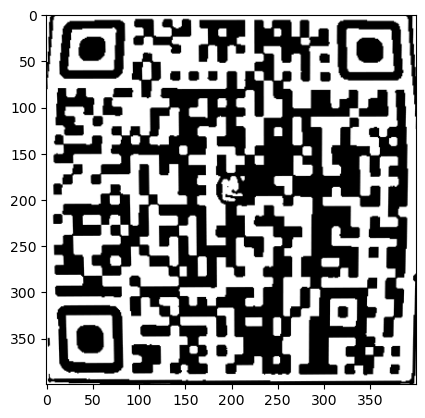

In [28]:
# Calculate the perspective transform matrix
matrix, _ = cv2.findHomography(src_points, dst_points)
# affine_matrix = getAffineTransform(src_point, dst_points)
# M = cv2.getPerspectiveTransform(src_points, dst_points)
out = cv2.warpPerspective(bw_im, matrix, (400,400))
                         
plt.imshow(out, cmap='gray')

In [29]:
decode(out)

[]

In [109]:
from scipy.interpolate import griddata

### 4

In [30]:
def undistort_image(image, k1, k2, p1, p2, k3=0):
    h, w = image.shape[:2]
    # Camera matrix (you may need to adjust these based on your setup)
    K = np.array([[w, 0, w / 2],
                  [0, w, h / 2],
                  [0, 0, 1]], dtype=np.float32)

    # Distortion coefficients
    D = np.array([k1, k2, p1, p2, k3], dtype=np.float32)

    # Undistort the image
    new_camera_matrix, _ = cv2.getOptimalNewCameraMatrix(K, D, (w, h), 1, (w, h))
    undistorted_image = cv2.undistort(image, K, D, None, new_camera_matrix)
    
    return undistorted_image

In [31]:
def apply_perspective_transform(image, src_points, dst_points):
    
    # Calculate the homography matrix
    matrix, _ = cv2.findHomography(src_points, dst_points)
    
    # Apply the perspective transformation
    transformed_image = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))
    return transformed_image

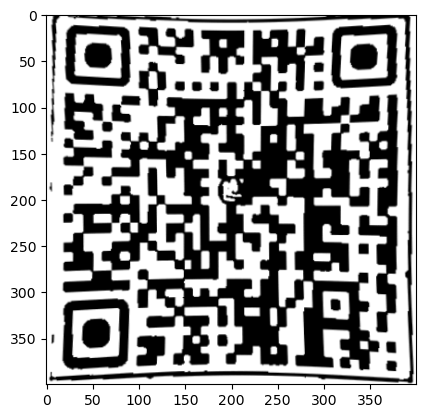

In [34]:
# Undistort the image
k1, k2, p1, p2 = -0.3, 0.2, 0.0, 0.0 
undistorted_image = undistort_image(bw_im, k1, k2, p1, p2)

# Apply perspective transform
flattened_image = apply_perspective_transform(undistorted_image, src_points, dst_points)

# Save or display the final flattened image
plt.imshow(flattened_image, cmap='gray')

In [35]:
decode(flattened_image)

[Decoded(data=b'{"id":"40d83fc0-a8b6-46b6-8292-54d12640319b","subject":"palette"}', type='QRCODE', rect=Rect(left=21, top=11, width=355, height=368), polygon=[Point(x=21, y=379), Point(x=375, y=377), Point(x=376, y=13), Point(x=23, y=11)], quality=1, orientation='UP')]